In [1]:
import numpy as np
import networkx as nx
import time
import random
import matplotlib.pyplot as plt

In [ ]:
def triangle_nx(G):
    for u in G:
        for v in G[u]:
            for w in G[v]:
                if w != u and G.has_edge(u, w):
                    return True
    return False

In [3]:
# Generate random graphs 
def generate_random_graph(n, p=0.5):
    return nx.gnp_random_graph(n, p)

In [4]:
# Generate random bipartite graphs
def generate_random_bipartite_graph(n):
    G = nx.Graph()
    left = range(n // 2)
    right = range(n // 2, n)
    G.add_nodes_from(left, bipartite=0)
    G.add_nodes_from(right, bipartite=1)
    for u in left:
        for v in right:
            if random.random() < 0.5:
                G.add_edge(u, v)
    return G

In [21]:
def measure_average_runtime(generate_fn, n, trials=100):
    times = []
    for _ in range(trials):
        G = generate_fn(n)
        t0 = time.perf_counter()
        triangle_nx(G)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return np.mean(times)

In [24]:
# Plot comparison
def run_experiment():
    sizes = [2**i for i in range(5, 15)]  
    random_times = []

    for n in sizes:
        print(f"\nTesting n = {n}")
        start = time.perf_counter()

        print(f"Testing n = {n}")
        random_time = measure_average_runtime(generate_random_graph, n)

        end = time.perf_counter()
        print(f"Done n = {n} in {end - start:.2f} seconds")

        random_times.append(random_time)
    
    print("Random Graph Times:", random_times)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(np.log2(sizes), np.log2(random_times), label='Random Graphs G(n, 0.5)', marker='o')
    plt.xlabel('log₂(Number of Vertices n)')
    plt.ylabel('log₂(Average Runtime in seconds)')
    plt.title('Triangle Detection Runtime vs Graph Size')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_experiment()


Testing n = 32
Testing n = 32
Done n = 32 in 0.03 seconds

Testing n = 64
Testing n = 64
Done n = 64 in 0.09 seconds

Testing n = 128
Testing n = 128
Done n = 128 in 0.36 seconds

Testing n = 256
Testing n = 256
Done n = 256 in 1.24 seconds

Testing n = 512
Testing n = 512
Done n = 512 in 5.23 seconds

Testing n = 1024
Testing n = 1024
Done n = 1024 in 22.03 seconds

Testing n = 2048
Testing n = 2048
Done n = 2048 in 94.04 seconds

Testing n = 4096
Testing n = 4096
Done n = 4096 in 416.17 seconds

Testing n = 8192
Testing n = 8192


KeyboardInterrupt: 


Testing n = 32
Testing n = 32
Done n = 32 in 0.08 seconds

Testing n = 64
Testing n = 64
Done n = 64 in 0.36 seconds

Testing n = 128
Testing n = 128
Done n = 128 in 2.05 seconds

Testing n = 256
Testing n = 256
Done n = 256 in 14.13 seconds

Testing n = 512
Testing n = 512
Done n = 512 in 105.17 seconds

Testing n = 1024
Testing n = 1024
Done n = 1024 in 797.48 seconds
Random Graph Times: [4.722000157926232e-06, 6.868999334983527e-06, 8.489999163430185e-06, 2.3590000491822138e-05, 2.0329999388195573e-05, 3.0319000215968118e-05]
Bipartite Graph Times: [0.0004020370007492602, 0.0021782730003178587, 0.0160428889990726, 0.12274985900090542, 0.9722056429993244, 7.653595982998377]


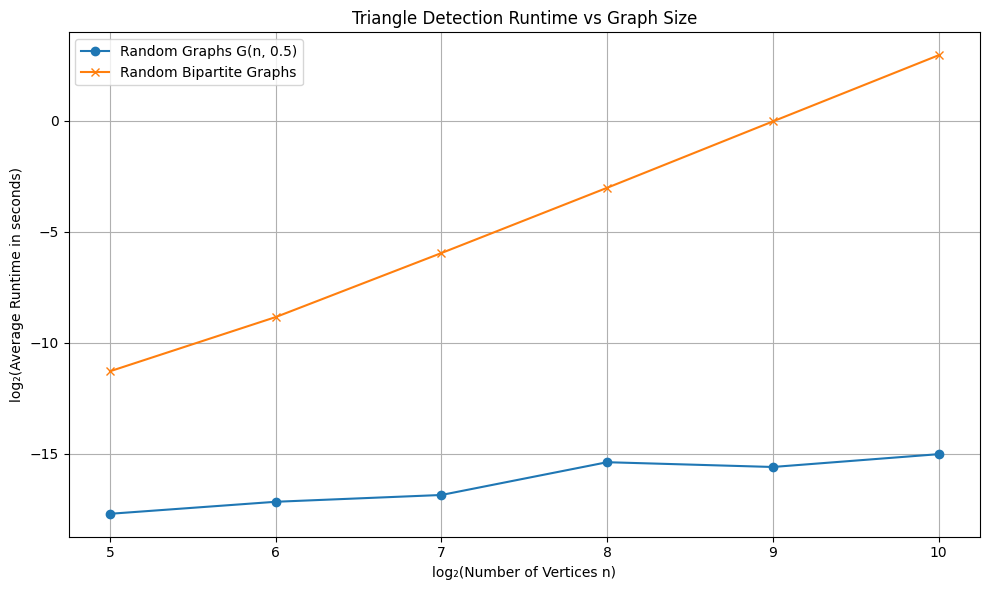

In [23]:
# Plot comparison
def run_experiment():
    sizes = [2**i for i in range(5, 11)]  
    random_times = []
    bipartite_times = []

    for n in sizes:
        print(f"\nTesting n = {n}")
        start = time.perf_counter()

        print(f"Testing n = {n}")
        random_time = measure_average_runtime(generate_random_graph, n)
        bipartite_time = measure_average_runtime(generate_random_bipartite_graph, n)

        end = time.perf_counter()
        print(f"Done n = {n} in {end - start:.2f} seconds")

        random_times.append(random_time)
        bipartite_times.append(bipartite_time)
    
    print("Random Graph Times:", random_times)
    print("Bipartite Graph Times:", bipartite_times)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(np.log2(sizes), np.log2(random_times), label='Random Graphs G(n, 0.5)', marker='o')
    plt.plot(np.log2(sizes), np.log2(bipartite_times), label='Random Bipartite Graphs', marker='x')
    plt.xlabel('log₂(Number of Vertices n)')
    plt.ylabel('log₂(Average Runtime in seconds)')
    plt.title('Triangle Detection Runtime vs Graph Size')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_experiment()